<h2>Importing Packages</h2>

In [27]:
library(phyloseq)
library(ggplot2)
library(repr)
library(Biostrings)

In [28]:
options(warn=0)
options(repr.plot.width=10, repr.plot.height=8)

<h2>Importing data </h2>

In [20]:
metadata = read.csv('../data/metadata.csv')
china_asv = read.csv('../data/china_ASVs_counts.csv')
china_taxa = readRDS('../data/china_ASVs.rds')
france_asv = read.csv('../data/france_ASVs_counts.csv')
france_taxa = readRDS('../data/france_ASVs.rds')
italy_asv = read.csv('../data/italy_ASVs_counts.csv')
italy_taxa = readRDS('../data/italy_ASVs.rds')
japan_asv = read.csv('../data/japan_tokyo_ASVs_counts.csv')
japan_taxa = readRDS('../data/japan_tokyo_ASVs.rds')
germany_asv = read.csv('../data/germany_ASVs_counts.csv')
germany_taxa = readRDS('../data/germany_ASVs.rds')
usa_na_asv = read.csv('../data/usa_nash_ASVs_counts.csv')
usa_na_taxa = readRDS('../data/usa_nash_ASVs.rds')
usa_wc_asv = read.csv('../data/usa_wc_ASVs_counts.csv')
usa_wc_taxa = readRDS('../data/usa_wc_ASVs.rds')

<h2>Adjusting data</h2>

In [21]:
rownames(metadata) = metadata$Run
metadata$Run = NULL

rownames(china_asv) = china_asv$X
china_asv$X = NULL
rownames(china_taxa) = rownames(china_asv)
china_asv = as.matrix(china_asv)
china_taxa = as.matrix(china_taxa)
china_metadata = subset(metadata, Country == 'China')

rownames(france_asv) = france_asv$X
france_asv$X = NULL
rownames(france_taxa) = rownames(france_asv)
france_asv = as.matrix(france_asv)
france_taxa = as.matrix(france_taxa)
france_metadata = subset(metadata, Country == 'France')

rownames(italy_asv) = italy_asv$X
italy_asv$X = NULL
rownames(italy_taxa) = rownames(italy_asv)
italy_asv = as.matrix(italy_asv)
italy_taxa = as.matrix(italy_taxa)
italy_metadata = subset(metadata, Country == 'Italy')

rownames(germany_asv) = germany_asv$X
germany_asv$X = NULL
rownames(germany_taxa) = rownames(germany_asv)
germany_asv = as.matrix(germany_asv)
germany_taxa = as.matrix(germany_taxa)
germany_metadata = subset(metadata, Country == 'Germany')

rownames(japan_asv) = japan_asv$X
japan_asv$X = NULL
rownames(japan_taxa) = rownames(japan_asv)
japan_asv = as.matrix(japan_asv)
japan_taxa = as.matrix(japan_taxa)
japan_metadata = subset(metadata, Country == 'Japan')


rownames(usa_na_asv) = usa_na_asv$X
usa_na_asv$X = NULL
rownames(usa_na_taxa) = rownames(usa_na_asv)
usa_na_asv = as.matrix(usa_na_asv)
usa_na_taxa = as.matrix(usa_na_taxa)
usa_na_metadata = subset(metadata, Country == 'USA-NA')

rownames(usa_wc_asv) = usa_wc_asv$X
usa_wc_asv$X = NULL
rownames(usa_wc_taxa) = rownames(usa_wc_asv)
usa_wc_asv = as.matrix(usa_wc_asv)
usa_wc_taxa = as.matrix(usa_wc_taxa)
usa_wc_metadata = subset(metadata, Country == 'USA-WC')

<h2>Creating Phyloseq Objects</h2>

In [24]:
china_ps <- phyloseq(otu_table(china_asv, taxa_are_rows=TRUE), 
               sample_data(china_metadata), 
               tax_table(china_taxa))


france_ps <- phyloseq(otu_table(france_asv, taxa_are_rows=TRUE), 
               sample_data(france_metadata), 
               tax_table(france_taxa))



italy_ps <- phyloseq(otu_table(italy_asv, taxa_are_rows=TRUE), 
               sample_data(italy_metadata), 
               tax_table(italy_taxa))



germany_ps <- phyloseq(otu_table(germany_asv, taxa_are_rows=TRUE), 
               sample_data(germany_metadata), 
               tax_table(germany_taxa))



japan_ps <- phyloseq(otu_table(japan_asv, taxa_are_rows=TRUE), 
               sample_data(japan_metadata), 
               tax_table(japan_taxa))




usa_na_ps <- phyloseq(otu_table(usa_na_asv, taxa_are_rows=TRUE), 
               sample_data(usa_na_metadata), 
               tax_table(usa_na_taxa))



usa_wc_ps <- phyloseq(otu_table(usa_wc_asv, taxa_are_rows=TRUE), 
               sample_data(usa_wc_metadata), 
               tax_table(usa_wc_taxa))

<h2>Merging Phyloseq objects<h2>

In [25]:
ps.glob = phyloseq::merge_phyloseq(china_ps, japan_ps, usa_wc_ps, usa_na_ps, france_ps, germany_ps, italy_ps)

<h2>Renaming ASVs</h2>

In [30]:
dna <- Biostrings::DNAStringSet(taxa_names(ps.glob))
names(dna) <- taxa_names(ps.glob)
ps <- merge_phyloseq(ps.glob, dna)
taxa_names(ps) <- paste0("ASV", seq(ntaxa(ps.glob)))

In [31]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 86972 taxa and 695 samples ]
sample_data() Sample Data:       [ 695 samples by 2 sample variables ]
tax_table()   Taxonomy Table:    [ 86972 taxa by 6 taxonomic ranks ]
refseq()      DNAStringSet:      [ 86972 reference sequences ]

<h2>Removing NAs </h2>

In [41]:
ps = prune_samples(sample_data(ps)$Status != "Control", ps)

In [55]:
ps=subset_taxa(ps,!is.na(Family))

In [56]:
ps <- prune_species(speciesSums(ps) > 0, ps)

Warning message:
“'prune_species' is deprecated.
Use 'prune_taxa' instead.
See help("Deprecated") and help("phyloseq-deprecated").”
Warning message:
“'speciesSums' is deprecated.
Use 'taxa_sums' instead.
See help("Deprecated") and help("phyloseq-deprecated").”


<h2>Plot alpha diversity</h2>

In [58]:
plot_richness(ps, x = 'Country',measures=c('Simpson', "ACE", "Shannon")) -> pr

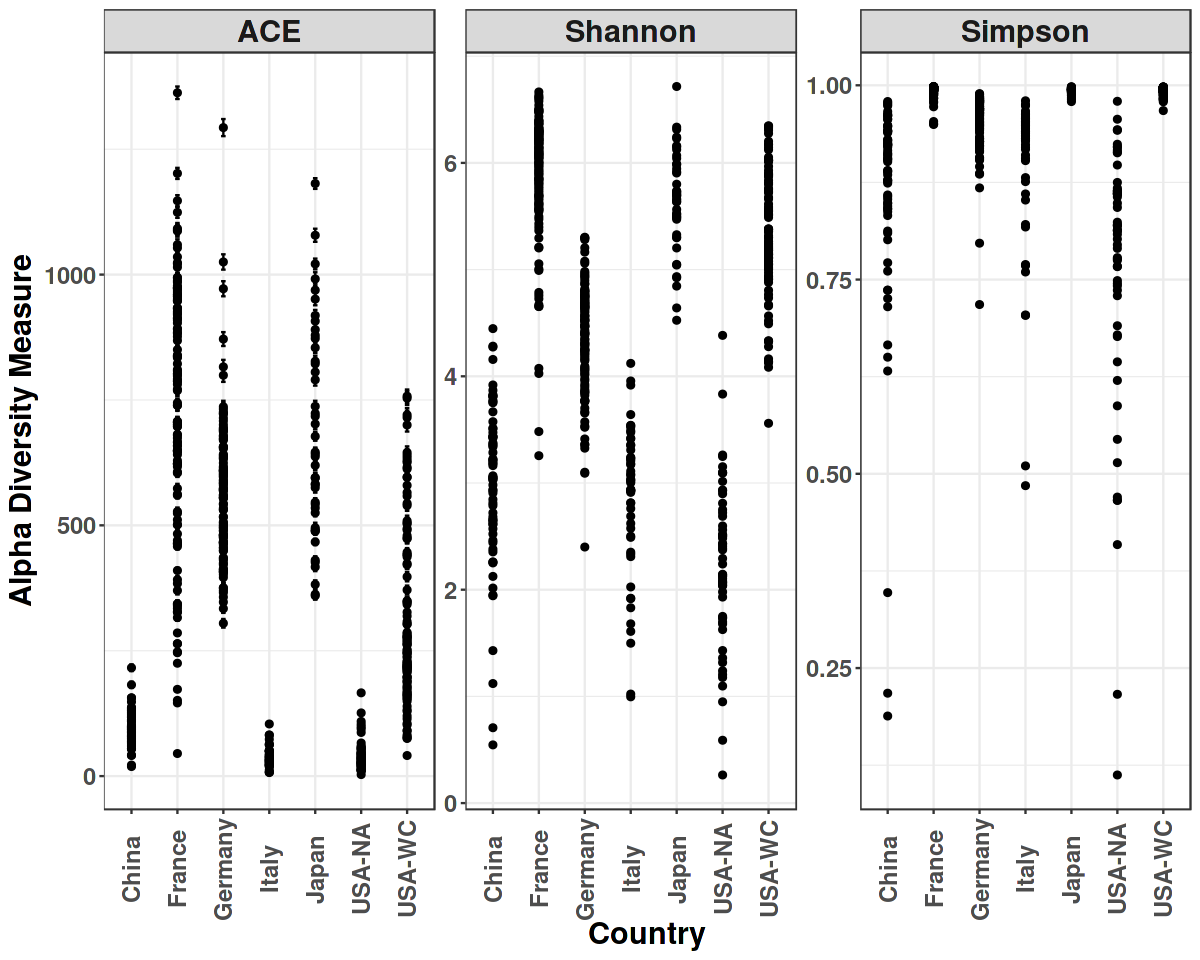

In [64]:
pr+theme_bw()+
theme(axis.text = element_text(size = 14, face = 'bold'), 
      axis.text.x = element_text(angle = 90, vjust = 0.5), 
      axis.title = element_text(size= 18, face= 'bold'),
     strip.text = element_text(size = 18, face = 'bold'))

<h2>Plot Beta diversity</h2>

In [65]:
ps.five = genefilter_sample(ps, filterfun_sample(function(x) x > 5), A=0.5*nsamples(ps))

In [ ]:
ps.ord <- ordinate(ps, "PCoA", "bray")

In [ ]:
p1 = plot_ordination(ps, ps.ord, type="taxa", color="Phylum")